## STEP 03: MACHINE LEARNING TASK

#### 3.1) Data preparing

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# load X 11-d dimensionality reducted
data_inputs = pd.read_excel("dataset/compressed_11d_v2.xlsx")
data_inputs.head()

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
0,-0.028874,-0.034820,-0.044897,-0.041207,-0.039174,-8.202325,-0.041880,-0.056215,-0.039023,-0.049477,-0.040485
1,-0.030227,-0.035068,-0.045751,-0.040894,-0.048882,-8.199735,-0.041880,-0.052109,-0.039023,-0.049080,-0.040485
2,-0.030203,-0.034803,-0.044897,-0.040682,-0.039408,-4.197295,-0.044871,-0.053145,-0.038746,-0.049080,-0.040485
3,-0.278864,-0.035140,-0.045717,-0.040682,-0.039205,-10.203114,-0.041881,-0.052108,-0.039301,-0.049080,-0.040485
4,0.642540,0.732538,-0.044952,-0.041415,-0.043180,3.797573,-0.041880,-0.052109,-0.039037,-0.049080,-0.040485


In [24]:
# load original dataset
data_outs = pd.read_excel("dataset/original_health_data.xlsx")
data_outs.head()

,Unnamed: 0,28,29,30,31,32,33,34,35,36,...,113,114,115,116,117,118,119,Kerdo,Starr,Robinson
0,patient 1,1.10,74,1.26,80,0.68,80,0.70,87,0.60,...,78,0.90,82,0.60,80,0.96,78,18.9,75.04,74.0
1,patient 2,1.10,76,1.30,76,1.00,78,1.30,82,1.20,...,70,0.90,70,0.66,80,0.80,80,-2.9,58.20,78.2
2,patient 3,0.48,78,0.38,80,0.60,82,0.16,28,0.49,...,80,0.90,60,0.95,80,0.85,76,-6.1,67.91,79.2
3,patient 4,1.40,70,1.23,70,0.84,80,1.50,74,1.30,...,60,0.96,68,1.00,88,0.85,70,3.2,57.52,68.2
4,patient 5,1.10,74,0.54,80,2.10,76,0.70,84,1.30,...,80,0.66,74,0.80,80,0.80,80,-20.7,58.36,63.8


In [25]:
# filter the indexes values
index_predictors = data_outs.loc[:, ["Kerdo", "Starr", "Robinson"]]
index_predictors.head()

,Kerdo,Starr,Robinson
0,18.9,75.04,74.0
1,-2.9,58.20,78.2
2,-6.1,67.91,79.2
3,3.2,57.52,68.2
4,-20.7,58.36,63.8


In [26]:
# concatenate inputs and indexes
data_indexes = pd.concat([data_inputs, index_predictors], axis = 1)
data_indexes.head()

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*,Kerdo,Starr,Robinson
0,-0.028874,-0.034820,-0.044897,-0.041207,-0.039174,-8.202325,-0.041880,-0.056215,-0.039023,-0.049477,-0.040485,18.9,75.04,74.0
1,-0.030227,-0.035068,-0.045751,-0.040894,-0.048882,-8.199735,-0.041880,-0.052109,-0.039023,-0.049080,-0.040485,-2.9,58.20,78.2
2,-0.030203,-0.034803,-0.044897,-0.040682,-0.039408,-4.197295,-0.044871,-0.053145,-0.038746,-0.049080,-0.040485,-6.1,67.91,79.2
3,-0.278864,-0.035140,-0.045717,-0.040682,-0.039205,-10.203114,-0.041881,-0.052108,-0.039301,-0.049080,-0.040485,3.2,57.52,68.2
4,0.642540,0.732538,-0.044952,-0.041415,-0.043180,3.797573,-0.041880,-0.052109,-0.039037,-0.049080,-0.040485,-20.7,58.36,63.8


In [27]:
# check metadata
data_indexes.columns

Index(['x1*', 'x2*', 'x3*', 'x4*', 'x5*', 'x6*', 'x7*', 'x8*', 'x9*', 'x10*',
       'x11*', 'Kerdo', 'Starr', 'Robinson'],
      dtype='object')

In [28]:
# check dimensionality
data_indexes.shape

(40, 14)

#### 3.2) Data Exploring

In [29]:
import seaborn as sbn
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
def hist_frequencies(data, bins):
    # calculate the nrows and ncols for plots
    numeric_cols = data.columns
    ncol_plots = 3
    nrow_plots = (len(numeric_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()    
    
    for i, col in enumerate(numeric_cols):
        sbn.histplot(data[col], color = "blue", bins = bins, ax = axs[i])
        axs[i].set_title("Histogram of frequencies for " + col)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
    plt.tight_layout()
    plt.show()

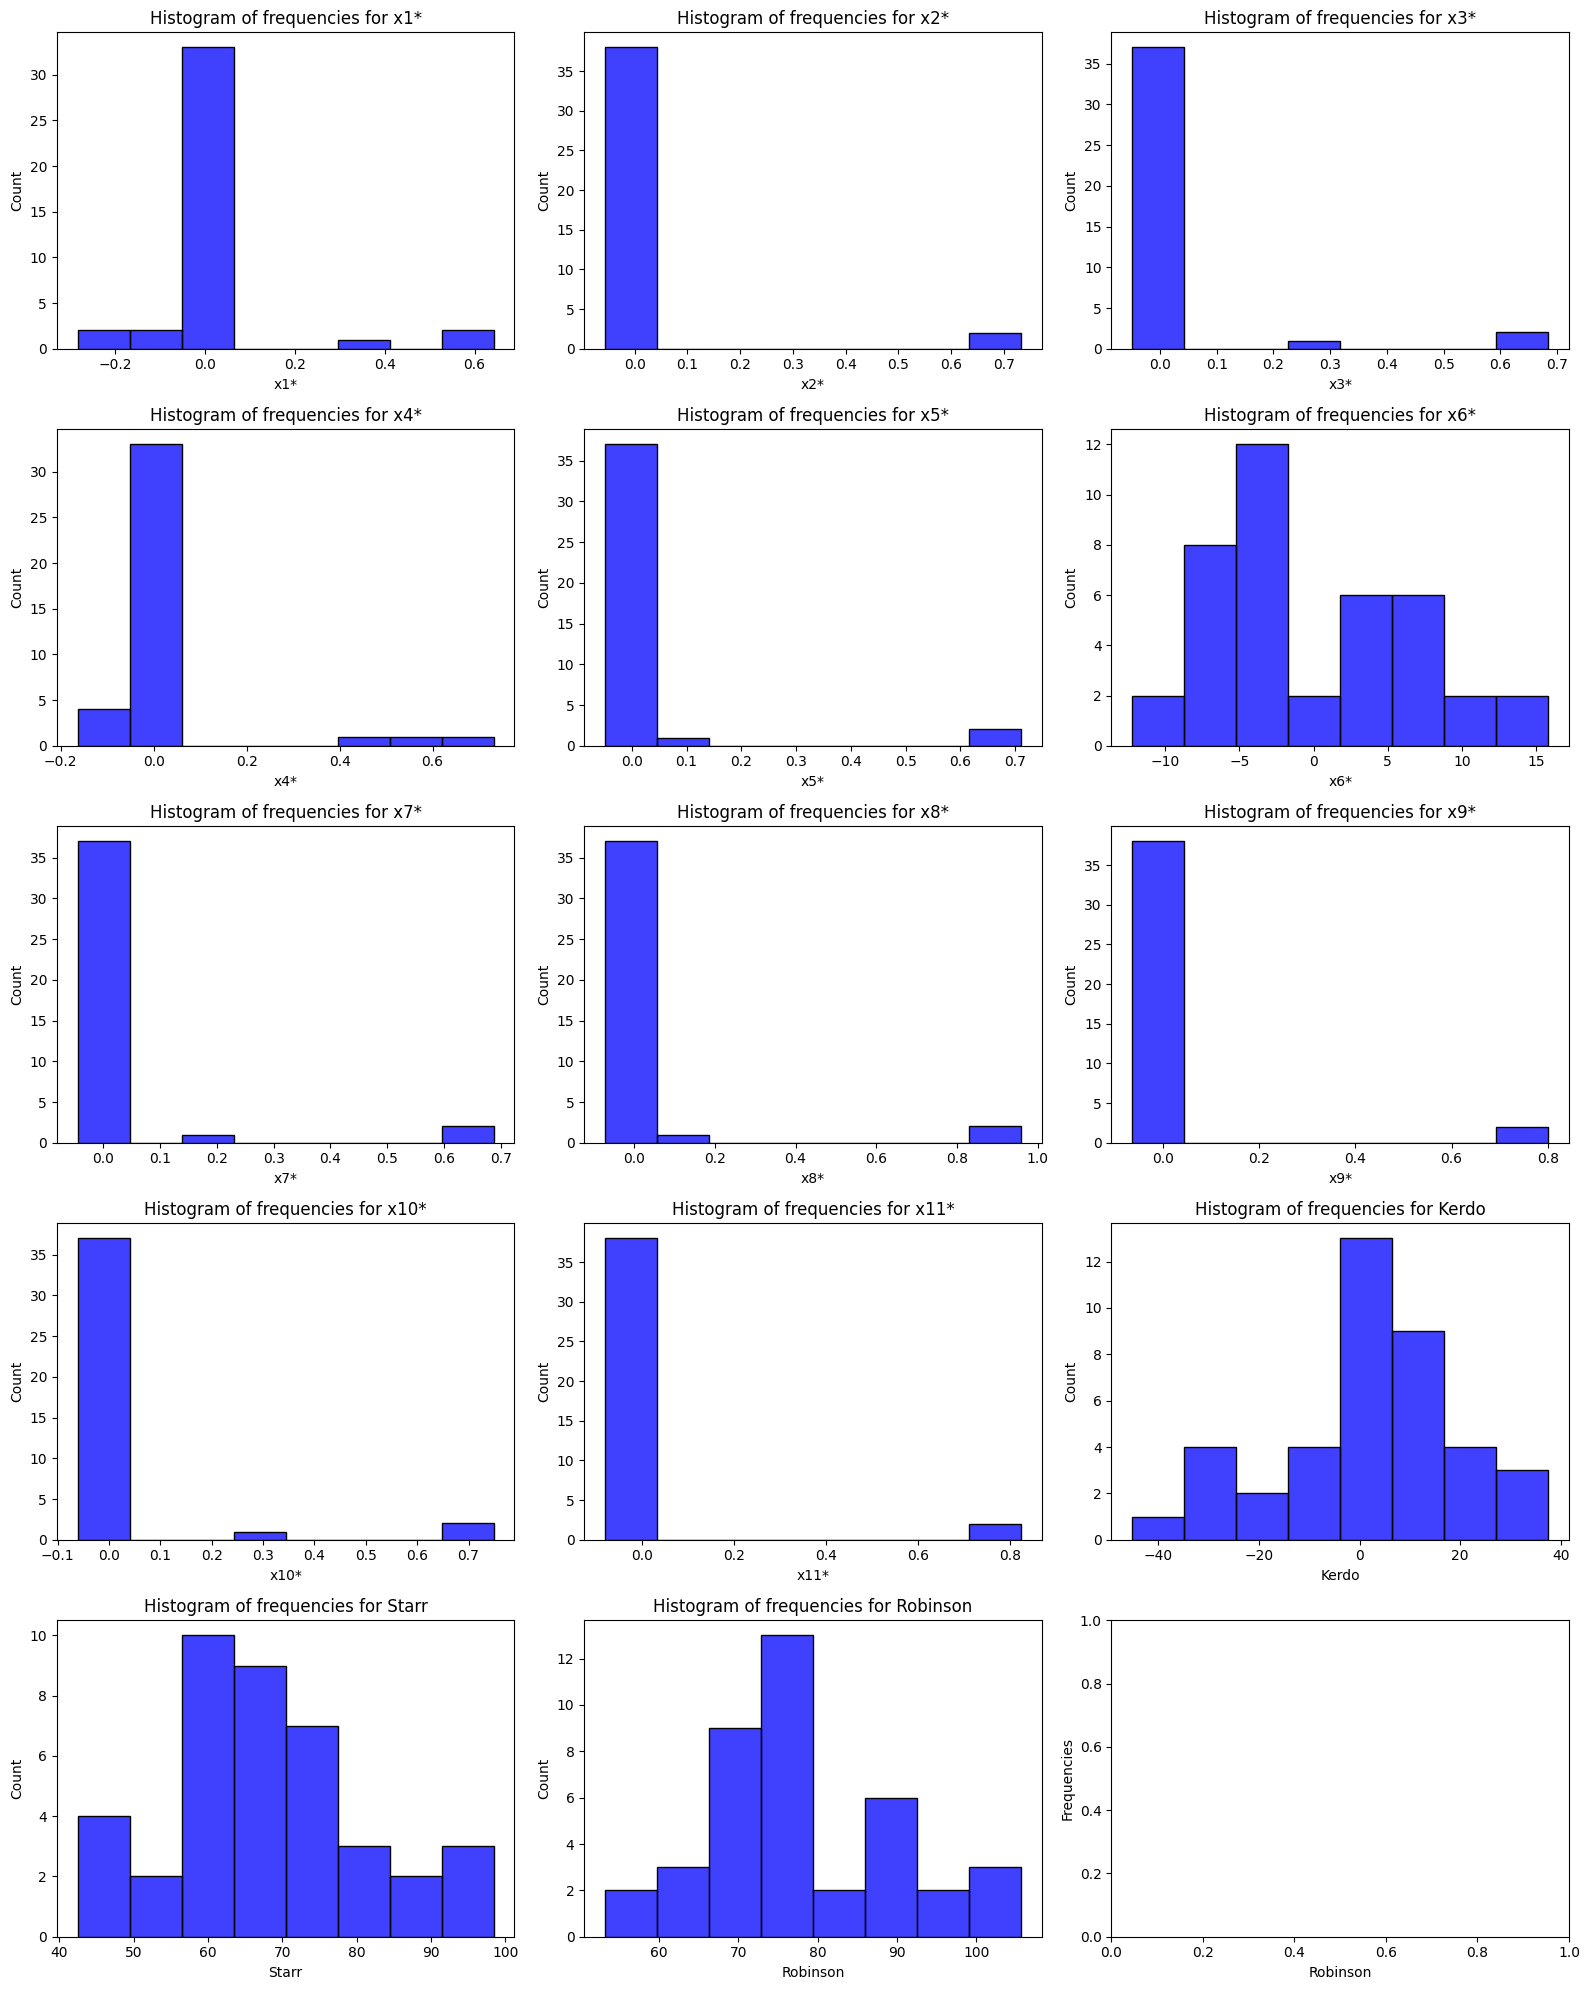

In [31]:
hist_frequencies(data_indexes, bins = 8)

### Process of training

In [38]:
x_all = data_indexes.iloc[:, :-3]
x_all.head()

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
0,-0.028874,-0.034820,-0.044897,-0.041207,-0.039174,-8.202325,-0.041880,-0.056215,-0.039023,-0.049477,-0.040485
1,-0.030227,-0.035068,-0.045751,-0.040894,-0.048882,-8.199735,-0.041880,-0.052109,-0.039023,-0.049080,-0.040485
2,-0.030203,-0.034803,-0.044897,-0.040682,-0.039408,-4.197295,-0.044871,-0.053145,-0.038746,-0.049080,-0.040485
3,-0.278864,-0.035140,-0.045717,-0.040682,-0.039205,-10.203114,-0.041881,-0.052108,-0.039301,-0.049080,-0.040485
4,0.642540,0.732538,-0.044952,-0.041415,-0.043180,3.797573,-0.041880,-0.052109,-0.039037,-0.049080,-0.040485


In [39]:
y_all = data_indexes.iloc[:, -3:]
y_all.head()

,Kerdo,Starr,Robinson
0,18.9,75.04,74.0
1,-2.9,58.20,78.2
2,-6.1,67.91,79.2
3,3.2,57.52,68.2
4,-20.7,58.36,63.8


In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# 初始化存储指标的列表
train_rmse_scores = []
train_r2_scores = []
test_rmse_scores = []
test_r2_scores = []


# 提取特征和目标变量
X = x_all  # 所有列 (x1* 到 x11*) 作为特征
y = y_all['Kerdo']  # 使用 Kerdo 列作为目标变量

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 定义超参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}

# 初始化梯度提升回归器
gbr = GradientBoostingRegressor(random_state=42)

# 初始化 GridSearchCV，设置 n_jobs=1 避免资源泄漏
grid_search = GridSearchCV(estimator=gbr, 
                           param_grid=param_grid, 
                           scoring='r2', 
                           cv = 5,
                           verbose = 1,
                           n_jobs=1)

# 初始化 K 折交叉验证 (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 执行 K 折交叉验证
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    try:
        # 分割训练集和测试集
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 使用 GridSearchCV 进行超参数调优
        grid_search.fit(X_train, y_train)
        best_gbr = grid_search.best_estimator_
        print(f"折 {fold} 最佳参数: {grid_search.best_params_}")

        # 在训练集上预测
        y_train_pred = best_gbr.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)

        # 在测试集上预测
        y_test_pred = best_gbr.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        # 保存指标
        train_rmse_scores.append(train_rmse)
        train_r2_scores.append(train_r2)
        test_rmse_scores.append(test_rmse)
        test_r2_scores.append(test_r2)

        # 打印该折的结果
        print(f"折 {fold}:")
        print(f"  训练集 RMSE: {train_rmse:.4f}, 训练集 R²: {train_r2:.4f}")
        print(f"  测试集 RMSE: {test_rmse:.4f}, 测试集 R²: {test_r2:.4f}")

    except Exception as e:
        print(f"折 {fold} 出错: {e}")

# 计算并打印平均指标
if train_rmse_scores and test_rmse_scores:
    avg_train_rmse = np.mean(train_rmse_scores)
    avg_train_r2 = np.mean(train_r2_scores)
    avg_test_rmse = np.mean(test_rmse_scores)
    avg_test_r2 = np.mean(test_r2_scores)

    print("\n5折交叉验证的平均指标:")
    print(f"  平均训练集 RMSE: {avg_train_rmse:.4f}")
    print(f"  平均训练集 R²: {avg_train_r2:.4f}")
    print(f"  平均测试集 RMSE: {avg_test_rmse:.4f}")
    print(f"  平均测试集 R²: {avg_test_r2:.4f}")
else:
    print("由于交叉验证中出现错误，未计算任何指标。")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
折 1 最佳参数: {'learning_rate': 0.01, 'n_estimators': 50}
折 1:
  训练集 RMSE: 11.6312, 训练集 R²: 0.4816
  测试集 RMSE: 22.9554, 测试集 R²: -0.0638
Fitting 5 folds for each of 9 candidates, totalling 45 fits
折 2 最佳参数: {'learning_rate': 0.1, 'n_estimators': 100}
折 2:
  训练集 RMSE: 0.1607, 训练集 R²: 0.9999
  测试集 RMSE: 13.9691, 测试集 R²: 0.2475
Fitting 5 folds for each of 9 candidates, totalling 45 fits
折 3 最佳参数: {'learning_rate': 0.1, 'n_estimators': 50}
折 3:
  训练集 RMSE: 1.4199, 训练集 R²: 0.9944
  测试集 RMSE: 20.6092, 测试集 R²: -0.9416
Fitting 5 folds for each of 9 candidates, totalling 45 fits
折 4 最佳参数: {'learning_rate': 0.01, 'n_estimators': 50}
折 4:
  训练集 RMSE: 13.6024, 训练集 R²: 0.5035
  测试集 RMSE: 13.8917, 测试集 R²: -0.5405
Fitting 5 folds for each of 9 candidates, totalling 45 fits
折 5 最佳参数: {'learning_rate': 0.01, 'n_estimators': 50}
折 5:
  训练集 RMSE: 12.6812, 训练集 R²: 0.4859
  测试集 RMSE: 18.2756, 测试集 R²: 0.1676

5折交叉验证的平均指标:
  平均训练集 RMSE: 7.8991
  平均训练集 R²

### Process of Train/Test model

In [17]:
def eval_model_perform(model, x, y):    
    y_pred = model.predict(x)
    rmse_val = round(np.sqrt(mean_squared_error(y, y_pred)), 4)
    r2_val = round(r2_score(y, y_pred), 4)

    return float(rmse_val), float(r2_val)

In [18]:
def evaluate_model(y_true, y_pred, model_name):    
    return {
        "Model": model_name,
        "R²": round(r2_score(y_true, y_pred), 4),
        "RMSE": round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)
    }

In [19]:
def plot_results(y_true, predictions, model_names):
    """可视化对比"""
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    for y_pred, name in zip(predictions, model_names):
        plt.scatter(y_true, y_pred, alpha=0.6, label=name)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--')
    plt.xlabel("实际值")
    plt.ylabel("预测值")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    for y_pred, name in zip(predictions, model_names):
        residuals = y_true - y_pred
        plt.hist(residuals, bins=15, alpha=0.5, label=name)
    plt.xlabel("残差")
    plt.ylabel("频数")
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("model_comparison.png")
    plt.show()

Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# hyperparameters definition
rf_params = {
    "n_estimators": [100, 200, 500],          # number of trees
    "max_depth": [10, 20, 30],         # maximum depth of trees
    "min_samples_split": [2, 5],         # minimum samples to split    
    "max_features": ['sqrt', 'log2', 0.5],   # number of features to consider
    "bootstrap": [True]
}

# define RF Model
def RFModel(x_train, y_train, params):
    # define the model    
    model = RandomForestRegressor(random_state=42)
    
    # hyperparameter optimization
    grid_search = GridSearchCV(estimator=model,
                              param_grid=params,
                              scoring="neg_mean_squared_error",
                              cv=5,
                              n_jobs=-1, 
                              verbose=2)
    grid_search.fit(x_train, y_train)
    
    # get best model
    best_model = grid_search.best_estimator_
    print(grid_search.best_params_)
    
    return best_model


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Hyperparameters for Decision Tree (simplified and adapted)
dt_params = {
    "max_depth": [5, 10, 15, 20],  # Typically shallower than RF    
    "max_features": ['sqrt', 'log2', 0.5, None],
    "ccp_alpha": [0, 0.01, 0.1]  # Cost complexity pruning
}

def DTModel(x_train, y_train, params):
    model = DecisionTreeRegressor(random_state=42)
    
    grid_search = GridSearchCV(estimator=model,
                                param_grid=params,
                                scoring="neg_mean_squared_error",
                                n_jobs=-1, 
                                verbose=2)
    grid_search.fit(x_train, y_train)
    
    best_model = grid_search.best_estimator_
    print("Decision Tree - Best params:", grid_search.best_params_)
    
    return best_model

LASSO model

In [136]:
from sklearn.linear_model import Lasso

# Hyperparameters for LASSO
lasso_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "selection": ["cyclic", "random"],  # Algorithm to select coefficients
    "max_iter": [50, 100, 200],  # Maximum iterations
    "tol": [1e-3, 1e-2]  # Tolerance for optimization
}

def LassoModel(x_train, y_train, params):
    model = Lasso(random_state=42)
    
    grid_search = GridSearchCV(estimator=model,
                             param_grid=params,
                             scoring="neg_mean_squared_error",                             
                             n_jobs=-1,
                             verbose=2)
    grid_search.fit(x_train_scaled, y_train)
    
    best_model = grid_search.best_estimator_
    print("LASSO - Best params:", grid_search.best_params_)
    
    # Store the scaler with the model
    best_model.scaler = scaler
    
    return best_model


Generator of Models

In [ ]:
def generate_models(x_train, y_train, x_test, y_test):
    results = {}
    indexes = ['Kerdo', 'Starr', 'Robinson']
    
    for index in indexes:
        print(f"\n=== Processing {index} ===")
        
        # Random Forest        
        print("\nTraining Random Forest...")
        rf_model = RFModel(x_train, y_train[index], rf_params)
        save_model(f"models/rf_{index}_v1.pkl", rf_model)
        rf_model = load_model(f"models/rf_{index}_v1.pkl")
        rmse_train_rf, r2_train_rf = eval_model_perform(rf_model, x_train, y_train[index])
        rmse_test_rf, r2_test_rf = eval_model_perform(rf_model, x_test, y_test[index])        

        # LASSO Regression
        print("\nTraining LASSO...")
        lasso_model = LassoModel(x_train, y_train[index], lasso_params)
        save_model(f"models/lasso_{index}_v1.pkl", lasso_model)
        lasso_model = load_model(f"models/lasso_{index}_v1.pkl")
        rmse_train_ls, r2_train_ls = eval_model_perform(lasso_model, x_train, y_train[index])
        rmse_test_ls, r2_test_ls = eval_model_perform(lasso_model, x_test, y_test[index])

        # Decision Tree
        print("\nTraining Decision Tree...")
        dt_model = DTModel(x_train, y_train[index], dt_params)
        save_model(f"models/dt_{index}_v1.pkl", dt_model)
        dt_model = load_model(f"models/dt_{index}_v1.pkl")
        rmse_train_dt, r2_train_dt = eval_model_perform(dt_model, x_train, y_train[index])
        rmse_test_dt, r2_test_dt = eval_model_perform(dt_model, x_test, y_test[index])
        
        # Store results
        results[index] = {     
            "Random Forest": {
                "train": {"rmse": rmse_train_rf, "r2": r2_train_rf},
                "test": {"rmse": rmse_test_rf, "r2": r2_test_rf}
            },       
            "LASSO": {
                "train": {"rmse": rmse_train_ls, "r2": r2_train_ls},
                "test": {"rmse": rmse_test_ls, "r2": r2_test_ls}
            },

            "DecisionTree": {
                "train": {"rmse": rmse_train_dt, "r2": r2_train_dt},
                "test": {"rmse": rmse_test_dt, "r2": r2_test_dt}
            }            
        }
        
        # Print comparison
        print(f"\nModel comparison for {index}:")
        print(f"Decision Tree - Test RMSE: {rmse_test_rf:.4f}, R2: {r2_test_rf:.4f}")
        print(f"LASSO - Test RMSE: {rmse_test_ls:.4f}, R2: {r2_test_ls:.4f}")
        print(f"Decision Tree - Test RMSE: {rmse_test_dt:.4f}, R2: {r2_test_dt:.4f}")
    
    return results


In [138]:
results = generate_models(x_train=x_train_scaled, y_train=y_train, 
                            x_test=x_test_scaled, y_test=y_test)


=== Processing Kerdo ===

Training Random Forest...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'bootstrap': True, 'max_depth': 10, 'max_features': 0.5, 'min_samples_split': 2, 'n_estimators': 100}

Training LASSO...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
LASSO - Best params: {'alpha': 10, 'max_iter': 50, 'selection': 'cyclic', 'tol': 0.001}

Training Decision Tree...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Decision Tree - Best params: {'ccp_alpha': 0, 'max_depth': 10, 'max_features': 'sqrt'}

Model comparison for Kerdo:
Decision Tree - Test RMSE: 22.0024, R2: -0.1757
LASSO - Test RMSE: 22.6726, R2: -0.2484
Decision Tree - Test RMSE: 21.9876, R2: -0.1741

=== Processing Starr ===

Training Random Forest...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}

Training LASSO...
Fitting 5 folds for each of 72 c

In [139]:
results

{'Kerdo': {'Random Forest': {'train': {'rmse': 6.5277, 'r2': 0.8467},
   'test': {'rmse': 22.0024, 'r2': -0.1757}},
  'LASSO': {'train': {'rmse': 16.673, 'r2': 0.0},
   'test': {'rmse': 22.6726, 'r2': -0.2484}},
  'DecisionTree': {'train': {'rmse': 1.206, 'r2': 0.9948},
   'test': {'rmse': 21.9876, 'r2': -0.1741}}},
 'Starr': {'Random Forest': {'train': {'rmse': 4.8377, 'r2': 0.8703},
   'test': {'rmse': 14.4024, 'r2': -0.0912}},
  'LASSO': {'train': {'rmse': 13.4306, 'r2': 0.0},
   'test': {'rmse': 13.8033, 'r2': -0.0023}},
  'DecisionTree': {'train': {'rmse': 6.2592, 'r2': 0.7828},
   'test': {'rmse': 15.035, 'r2': -0.1892}}},
 'Robinson': {'Random Forest': {'train': {'rmse': 4.0992, 'r2': 0.8915},
   'test': {'rmse': 12.9897, 'r2': -0.3761}},
  'LASSO': {'train': {'rmse': 12.4429, 'r2': 0.0},
   'test': {'rmse': 11.1731, 'r2': -0.0181}},
  'DecisionTree': {'train': {'rmse': 3.394, 'r2': 0.9256},
   'test': {'rmse': 16.72, 'r2': -1.2799}}}}